In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [2]:
url = 'https://www.telegraph.co.uk/guides/100-best-cars'

In [3]:
r = requests.get(url).text

In [4]:
soup = BeautifulSoup(r, 'html')

In [5]:
soup_body = soup.body

<body>
 <noscript>
  You need to enable JavaScript to run this app...
 </noscript>
 <div id="root">
  <div>
   <div>
    <div class="black" id="nav-bar" style="border-bottom:1px solid #ddd">
     <header class="site-header site-header--has-sub-navigation">
      <div class="site-header__primary-wrapper">
       <div class="site-header__container site-header__primary-content">
        <div class="site-header__logo">
         <a class="e-site-logo" href="https://www.telegraph.co.uk">
          <svg aria-labelledby="site-logo-title" class="e-site-logo__image" id="site-logo" viewbox="0 0 190 32" xmlns="http://www.w3.org/2000/svg">
           <title id="site-logo-title">
            The Telegraph
           </title>
           <path d="M29.753 27.809c1.28-.839 2.56-1.81 2.56-3.796V11.785L30.371 9.71l-.75.75 1.677 1.81v11.698c0 1.634-.618 2.826-1.59 3.664l.045.177zm-7.46-25.912l-.045.132c.574.22 1.28.795 1.28 1.942v18.011l-.706.706 2.737 2.296.795-.662-2.207-1.81.397-.353V4.148c0-1.457-1.28-
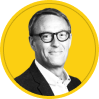
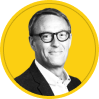

In [6]:
print(soup_body.prettify())

In [7]:
car_links_list = soup_body.find_all('a', href = True)

In [8]:
car_links_list

[<a class="e-site-logo" href="https://www.telegraph.co.uk"><svg aria-labelledby="site-logo-title" class="e-site-logo__image" id="site-logo" viewbox="0 0 190 32" xmlns="http://www.w3.org/2000/svg"><title id="site-logo-title">The Telegraph</title><path d="M29.753 27.809c1.28-.839 2.56-1.81 2.56-3.796V11.785L30.371 9.71l-.75.75 1.677 1.81v11.698c0 1.634-.618 2.826-1.59 3.664l.045.177zm-7.46-25.912l-.045.132c.574.22 1.28.795 1.28 1.942v18.011l-.706.706 2.737 2.296.795-.662-2.207-1.81.397-.353V4.148c0-1.457-1.28-2.163-2.251-2.251zm1.633 27.148c3.443-.265 6.886-1.413 6.886-5.077V12.447l-1.589-1.59-1.721 1.678v8.652l1.412 1.28-3.267 2.958h-.308l-3.223-2.737.883-.883V4.148c0-1.324-1.148-2.03-1.81-2.207v-.265c.309-.177.794-.265 1.413-.265 1.103 0 2.119.662 2.427 1.413h.089c.662-1.016 1.721-1.413 2.737-1.413.309 0 .662.044 1.015.133v.353c-.574.176-1.413.883-1.413 2.604v7.328l4.238-4.061h.31c.308.309 2.162 1.986 2.515 2.207.177.088.398.177.618.177.354 0 .618-.133.883-.265v.485c-.353.31-.75.883-.7

In [9]:
car_links = []
for links in car_links_list:
    a = links.get('href')
    car_links.append([a])

In [10]:
car_links

[['https://www.telegraph.co.uk'],
 ['/guides/100-best-cars'],
 ['https://www.telegraph.co.uk/search.html'],
 ['https://premium.telegraph.co.uk/?ICID=guides_genericsub_generic_guide_topnav&redirectTo=http%3A%2F%2Flocalhost%3A45678%2Fguides%2F100-best-cars%2F'],
 ['https://www.telegraph.co.uk/secure/login?redirectTo=http%3A%2F%2Flocalhost%3A45678%2Fguides%2F100-best-cars%2F'],
 ['/guides/100-best-cars/car/audi-80'],
 ['/guides/100-best-cars/car/daimler-double-six'],
 ['/guides/100-best-cars/car/facel-vega-hk-500'],
 ['/guides/100-best-cars/car/vauxhall-cavalier-mk-2'],
 ['/guides/100-best-cars/car/lancia-lambda'],
 ['/guides/100-best-cars/car/buick-riviera'],
 ['/guides/100-best-cars/car/maserati-bora'],
 ['/guides/100-best-cars/car/triumph-tr-2'],
 ['/guides/100-best-cars/car/opel-gt'],
 ['/guides/100-best-cars/car/bmw-x-5-mk-1'],
 ['/guides/100-best-cars/car/avions-voisin-c-28-aerosport'],
 ['/guides/100-best-cars/car/bristol-400'],
 ['/guides/100-best-cars/car/cord-810-812'],
 ['/guid

In [11]:
len(car_links)

154

In [12]:
car_links1 = car_links[5:135]

In [13]:
car_links1

[['/guides/100-best-cars/car/audi-80'],
 ['/guides/100-best-cars/car/daimler-double-six'],
 ['/guides/100-best-cars/car/facel-vega-hk-500'],
 ['/guides/100-best-cars/car/vauxhall-cavalier-mk-2'],
 ['/guides/100-best-cars/car/lancia-lambda'],
 ['/guides/100-best-cars/car/buick-riviera'],
 ['/guides/100-best-cars/car/maserati-bora'],
 ['/guides/100-best-cars/car/triumph-tr-2'],
 ['/guides/100-best-cars/car/opel-gt'],
 ['/guides/100-best-cars/car/bmw-x-5-mk-1'],
 ['/guides/100-best-cars/car/avions-voisin-c-28-aerosport'],
 ['/guides/100-best-cars/car/bristol-400'],
 ['/guides/100-best-cars/car/cord-810-812'],
 ['/guides/100-best-cars/car/hispano-suiza-h-6'],
 ['/guides/100-best-cars/car/riley-mph'],
 ['/guides/100-best-cars/car/skoda-s-110-r'],
 ['/guides/100-best-cars/car/morgan-plus-8'],
 ['/guides/100-best-cars/car/honda-jazz-mk-1'],
 ['/guides/100-best-cars/car/chevrolet-corvette-c-1-c-2'],
 ['/guides/100-best-cars/car/bentley-continental-gt-mk-1'],
 ['https://secure.telegraph.co.uk/s

In [14]:
len(car_links1)

130

In [15]:
indexes = [20, 21, 22, 23, 24, 45, 46, 47, 48, 49, 70, 71, 72, 73, 74, 95, 96, 97, 98, 99, 110, 111, 112, 113, 114, 120, 121, 122, 123, 124]
for index in sorted(indexes, reverse = True):
    del car_links1[index]

In [16]:
car_links1

[['/guides/100-best-cars/car/audi-80'],
 ['/guides/100-best-cars/car/daimler-double-six'],
 ['/guides/100-best-cars/car/facel-vega-hk-500'],
 ['/guides/100-best-cars/car/vauxhall-cavalier-mk-2'],
 ['/guides/100-best-cars/car/lancia-lambda'],
 ['/guides/100-best-cars/car/buick-riviera'],
 ['/guides/100-best-cars/car/maserati-bora'],
 ['/guides/100-best-cars/car/triumph-tr-2'],
 ['/guides/100-best-cars/car/opel-gt'],
 ['/guides/100-best-cars/car/bmw-x-5-mk-1'],
 ['/guides/100-best-cars/car/avions-voisin-c-28-aerosport'],
 ['/guides/100-best-cars/car/bristol-400'],
 ['/guides/100-best-cars/car/cord-810-812'],
 ['/guides/100-best-cars/car/hispano-suiza-h-6'],
 ['/guides/100-best-cars/car/riley-mph'],
 ['/guides/100-best-cars/car/skoda-s-110-r'],
 ['/guides/100-best-cars/car/morgan-plus-8'],
 ['/guides/100-best-cars/car/honda-jazz-mk-1'],
 ['/guides/100-best-cars/car/chevrolet-corvette-c-1-c-2'],
 ['/guides/100-best-cars/car/bentley-continental-gt-mk-1'],
 ['/guides/100-best-cars/car/mazda-

In [17]:
def listtostring(s):
    str1 = ' '
    return(str1.join(s))

In [18]:
real_car_links = []
for links in car_links1:
    links = listtostring(links)
    links = 'https://www.telegraph.co.uk' + links
    r_link = requests.get(links).text
    soup1 = BeautifulSoup(r_link, 'html')
    real_car_links.append([soup1])

In [ ]:
#real_car_links

In [19]:
df = pd.DataFrame(columns = ['Name', 'Starting Date', 'Car Type', 'Manufacturing Country', 'Engine', 'Top Speed', '0 to 60', 'Power'])
for j in real_car_links:
    for h in j:
        title = h.find('div', class_ = 'title').text
        starting_date = h.find('div', class_ = 'starting-date').text
        car_type = h.find('div', class_ = 'car-type').text
        country = h.find('div', class_ = 'country').text
        details = h.find_all('div', class_ = 'row')
        details = details[0:2]
        engine = details[0].find_all('div')[0].text.split('Engine')[1]
        top_speed = details[0].find_all('div')[1].text.split('Top Speed')[1]
        zero_to_sixty = details[1].find_all('div')[1].text.split('0 to 60')[1]
        power = details[1].find_all('div')[0].text.split('Power')[1]
        df = df.append({'Name' : title, 'Starting Date' : starting_date, 'Car Type' : car_type, 'Manufacturing Country' : country, 'Engine' : engine, 'Top Speed' : top_speed, '0 to 60' : zero_to_sixty, 'Power' : power}, ignore_index = True)

In [20]:
df

,Name,Starting Date,Car Type,Manufacturing Country,Engine,Top Speed,0 to 60,Power
0,Audi 80,1986,Saloon,Germany,"1781cc, 4-cyl",114mph,11.1s,110bhp
1,Daimler Double-Six,1972,Saloon,United Kingdom,"5345cc, 12-cyl",151mph,8.1s,2.91bhp
2,Facel Vega HK500,1959,CoupÃ©,France,"6279cc, 8-cyl",147mph,8.5s,335bhp
3,Vauxhall Cavalier Mk2,1981,Saloon,United Kingdom,"1598cc, 4-cyl",108mph,12s,75bhp
4,Lancia Lambda,1922,Convertible,Italy,"2121cc, 4-cyl",74mph,0s,49bhp
...,...,...,...,...,...,...,...,...
95,Land Rover Series 1,1948,SUV,United Kingdom,"1595cc, 4-cyl",58mph,0s,50bhp
96,CitroÃ«n DS,1955,Saloon,France,"1911cc, 4-cyl",88.4mph,18.6s,74bhp
97,Fiat Cinquecento Nuova,1957,Saloon,Italy,"479cc, 2-cyl",54mph,0s,13bhp
98,Volkswagen Golf Mk1,1974,Hatchback,Germany,"1588cc, 4-cyl",107mph,14s,69bhp


In [21]:
df[['Car Type']] = df[['Car Type']].replace('CoupÃ©', 'Coupé')

In [22]:
df[['0 to 60']] = df[['0 to 60']].replace('0s', '')

In [23]:
df

,Name,Starting Date,Car Type,Manufacturing Country,Engine,Top Speed,0 to 60,Power
0,Audi 80,1986,Saloon,Germany,"1781cc, 4-cyl",114mph,11.1s,110bhp
1,Daimler Double-Six,1972,Saloon,United Kingdom,"5345cc, 12-cyl",151mph,8.1s,2.91bhp
2,Facel Vega HK500,1959,Coupé,France,"6279cc, 8-cyl",147mph,8.5s,335bhp
3,Vauxhall Cavalier Mk2,1981,Saloon,United Kingdom,"1598cc, 4-cyl",108mph,12s,75bhp
4,Lancia Lambda,1922,Convertible,Italy,"2121cc, 4-cyl",74mph,,49bhp
...,...,...,...,...,...,...,...,...
95,Land Rover Series 1,1948,SUV,United Kingdom,"1595cc, 4-cyl",58mph,,50bhp
96,CitroÃ«n DS,1955,Saloon,France,"1911cc, 4-cyl",88.4mph,18.6s,74bhp
97,Fiat Cinquecento Nuova,1957,Saloon,Italy,"479cc, 2-cyl",54mph,,13bhp
98,Volkswagen Golf Mk1,1974,Hatchback,Germany,"1588cc, 4-cyl",107mph,14s,69bhp


In [ ]:
#print(df.to_string())

In [24]:
df.to_csv('100 Best Cars.csv', index = False)